# **Maestr√≠a en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnol√≥gico de Monterrey

### Prof Luis Eduardo Falc√≥n Morales

## 9.2 Actividad: Traducciones y Clasificaci√≥n de Textos

#### **Nombres y matr√≠culas de los integrantes del equipo:**
Equipo 9:

Andrea Cant√∫ Mart√≠nez     | A01235000

Yohanna Ceballos Salom√≥n  | A01795115

Juan Manuel Carballo M.   | A01166758

Armando Cerda De La Rosa  | A01570376

Mauricio Castilo Galindo  | A01795453

In [2]:
!pip install transformers --quiet
!pip install datasets --quiet
!pip install sentencepiece --quiet
!pip install sacremoses --quiet
!pip install huggingface_hub --quiet
!pip install -U accelerate --quiet
!pip install transformers[torch] --quiet

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.8/547.8 kB 6.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40.8/40.8 MB 35.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64.9/64.9 kB 7.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 17.0 MB/s eta 0:00:00
ERROR: pip's dependency reso

In [3]:
# Aqu√≠ deber√°s incluir todas las librer√≠as que requieras durante esta actividad:
import os
import re
import json
import string
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import google.generativeai as genai

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
from transformers import pipeline
from transformers import AutoTokenizer

from transformers import AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer

from huggingface_hub import notebook_login
from datasets import load_metric
from datasets import Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Para usar GPU en Google Colab: 'Runtime' > 'Change runtime type', y seleccionar 'GPU'
# Revisar si la GPU est√° disponible
import torch
torch.cuda.is_available()

# Pregunta 1

Descarga el archivo amazonbaby5000.csv que se encuentra en Canvas. Este archivo est√°formado de 5 mil comentarios en ingl√©s sobre productos para beb√© adquiridos a trav√©s de la plataforma de Amazon.

In [6]:
amazon = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNA/Procesamiento de Lenguaje Natural/amazonbaby5000.csv")

In [7]:
amazon.head(10)

review  rating
0  I think it is more Expensive than drugstore th...       0
1  When I saw this on Amazon, I put it into my wi...       1
2  We really like these valances.  They have such...       1
3  No light emits from the night light. They pain...       0
4  I was really hoping for this to be a conventie...       0
5  My two year old son loves this bookshelf!! We ...       1
6  This light was wonderful for the first few day...       0
7  I was mailed the wrong product when I ordered ...       0
8  Great for Apartment or close quarters living! ...       1
9  I used these bibs on my older child and loved ...       1

In [ ]:
# Se tienen 1160 comentarios negativos y 3840 positivos.
# Es decir cerca del 77% de los comentarios son positivos.
amazon.rating.value_counts()

rating
1    3840
0    1160
Name: count, dtype: int64

# Pregunta 2

Realiza una partici√≥n de los datos en el porcentaje que consideres adecuado, en entrenamiento y prueba.

In [9]:
# Separar X y Y
X = list(amazon.review)     # Lista de strings
Y = list(amazon.rating)     # Lista de enteros 0s y 1s

In [10]:
# Separar en conjuntos de test, train y val
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(X, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

# Pregunta 3

Utiliza un modelo Transformer de HuggingFace para an√°lisis de sentimiento en ingl√©s y lleva a
cabo la predicci√≥n de los comentarios en los siguientes casos.

# 3a
Utiliza uno de los modelos Transformer pre-entrenados que consideres adecuado de
DistilBERT de Huggingface para an√°lisis de sentimiento y lleva a cabo el entrenamiento y evaluaci√≥n del desempe√±o con exatitud (accuracy) y matriz de confusi√≥n.

NOTA: Recuerda obtener el porcentaje de las clases positivas y negativas para tener una idea clara de si el modelo encontrado queda subentrenado.

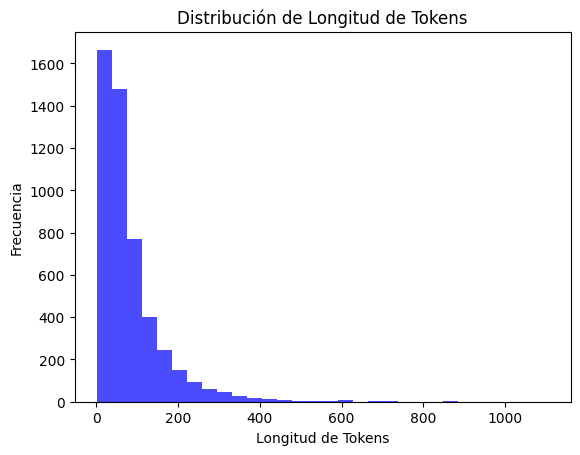

In [ ]:
# Tiempo de ejecuci√≥n en Colab (T4-GPU): 9 minutos!

# Relizar un gr√°fico con la distribuci√≥n de la cantidad de palabras
# en cada comentario, usar como separador el espacio. Es una aproximaci√≥n
# dado a que no todas las palabras se pueden tokenizar directamente.
Y = [len(review.split()) for review in X]

# Graficar histograma de las longitudes de tokens para determinar el
# valor para truncar los comentarios muy largos.
plt.hist(Y, bins=30, color='blue', alpha=0.7)
plt.xlabel('Longitud de Tokens')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Longitud de Tokens')
plt.show()
# Se observa que son muy pocos los comentarios de m√°s de 300 tokens,
# por lo que se selecciona el valor de 256 pues contiene casi todos
# los 5000 comentarios y as√≠ se optimiza el tama√±o de las matrices.

In [ ]:
# Definir el modelo DistilBERT
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

distilbert_pipe = pipeline("sentiment-analysis",
                           model= model_name,
                           tokenizer= model_name,
                           padding=True,
                           truncation=True,
                           max_length=256,
                           )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Usar el modelo pre-entrenado definido previamente para predecir los valores de las etiquetas
yhat_train = distilbert_pipe(x_train)
yhat_train = [1 if item['label'] == 'POSITIVE' else 0 for item in yhat_train]

In [ ]:
print(len(x_train), len(yhat_train))

3500 3500


In [ ]:
# Matriz de confusi√≥n:
# (etiquetas_reales, etiquetas_de_predicciones)
# Nota: la siguiente funci√≥n fue tomada de un ejemplo del Dr. Luis Falc√≥n
def mi_cm(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Pastel1', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicci√≥n")
  plt.show()

# Funci√≥n para desplegar la matriz de confusi√≥n y el reporte dado por la funci√≥n classification_report() de sklearn
def conf_matrix_class_report(yvalT, yhat):
  mi_cm(yvalT, yhat) # Matriz de confuci√≥n usando los datos de validaci√≥n
  print("---------------------------------------------------------------------")
  print(classification_report(yvalT, yhat, zero_division=0)) # Reporte dado por la funci√≥n classification_report() de sklearn

# Se despliega el porcentaje de la clase positiva y negativa
def print_percentage_pos_neg_class(yval):
  minority_class_per = round(100.*(sum(yval) / len(yval)), 2)
  majority_class_per = 100 - minority_class_per
  print('Porcentaje de la clase minoritaria (clase positiva): %.1f%%' % minority_class_per)
  print('Porcentaje de la clase mayoritaria (clase negativa): %.1f%%' % majority_class_per)

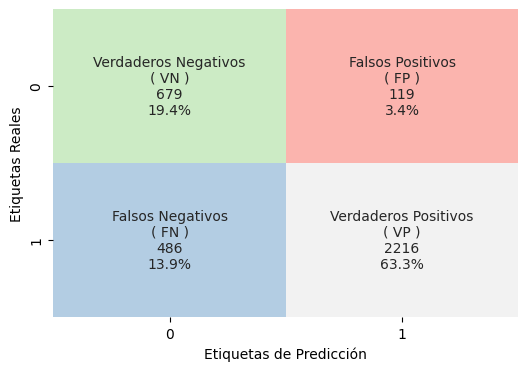

---------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.85      0.69       798
           1       0.95      0.82      0.88      2702

    accuracy                           0.83      3500
   macro avg       0.77      0.84      0.79      3500
weighted avg       0.87      0.83      0.84      3500

Porcentaje de la clase minoritaria (clase positiva): 77.2%
Porcentaje de la clase mayoritaria (clase negativa): 22.8%


In [ ]:
# Evaluaci√≥n del desempe√±o con exatitud (accuracy) y matriz de confusi√≥n
conf_matrix_class_report(y_train, yhat_train)
print_percentage_pos_neg_class(y_train)

#3b

Realiza una partici√≥n del conjunto de entrenamiento en uno nuevo de entrenamiento y
validaci√≥n, con los porcentajes que consideres adecuados y utilizando el mismo modelo
DistilBERT del inciso anterior, ajusta sus hiperpar√°metros (fine-tuning) para entrenar y
evaluar el desempe√±o de este nuevo modelo

In [ ]:
# El ejercicio 3B fue realizado usando como gu√≠a el ejemplo: https://huggingface.co/blog/sentiment-analysis-python
# Tiempo de ejecuci√≥n en Colab (T4-GPU): 3 minutos!

# Partici√≥n del conjunto de entrenamiento (x_train, y_train) en uno nuevo de entrenamiento y validaci√≥n
x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(x_train, y_train, train_size=.8, shuffle=True, random_state=1)
print(len(x_train_train), len(x_train_val))
print(len(y_train_train), len(y_train_val))

2800 700
2800 700


In [ ]:
# Para pre-procesar los comentarios de Amazon, usaremos DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
# Preparar los comentarios ("text") y rating ("label") y en un objeto tipo Dataset
small_train_dataset = {'text': x_train_train, 'label': y_train_train}
small_val_dataset = {'text': x_train_val, 'label': y_train_val}
small_train_dataset = Dataset.from_dict(small_train_dataset)
small_val_dataset = Dataset.from_dict(small_val_dataset)
# Cargando el tokenizer creado previamente
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_train = small_train_dataset.map(preprocess_function, batched=True)
tokenized_test = small_val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2800 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

In [ ]:
# Para agilizar el entrenamiento, se usa data_collator para convertir
# los datos de entrenamiento a tensores de PyTorch y concatenarlos
# con la cantidad correcta de ceros (Padding)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Entrenamiento del modelo
# Definir DistilBERT como modelo base
distilbert_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
# Definir las m√©tricas a usar para evaluar el modelo fine-tuned
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   return {"accuracy": accuracy, "f1": f1}

In [ ]:
# Darse de alta en la cuenta de Hugging Face
notebook_login() # token: *******

In [ ]:
repo_name = "finetuning-sentiment-model-5000-amazon-samples"

# Definir los argumentos de entrenamiento (hiperpar√°metros (fine-tuning))
training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

# Definir un entrenador con todos los objetos consolidados hasta el momento
trainer = Trainer(
   model=distilbert_model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

In [ ]:
# Realizar el entrenamiento del modelo de an√°lisis de sentimiento
trainer.train()

TrainOutput(global_step=350, training_loss=0.21704166957310267, metrics={'train_runtime': 98.7971, 'train_samples_per_second': 56.682, 'train_steps_per_second': 3.543, 'total_flos': 491292604371648.0, 'train_loss': 0.21704166957310267, 'epoch': 2.0})

In [ ]:
# Evaluar el desempe√±o del modelo DistilBERT con el fine-tuned aplicado
trainer.evaluate()

<ipython-input-21-5ddce60af89d>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


The repository for f1 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/f1.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


{'eval_loss': 0.33822715282440186,
 'eval_accuracy': 0.8971428571428571,
 'eval_f1': 0.9344262295081968,
 'eval_runtime': 11.3612,
 'eval_samples_per_second': 61.613,
 'eval_steps_per_second': 3.873,
 'epoch': 2.0}

In [ ]:
# A manera de ejemplo, se prueba el modelo generado con algunos
# comentarios de validaci√≥n (x_val, y_val) generados previamente

# Subir el modelo al Hub de Hugging Face
trainer.push_to_hub()
# Utilizar la clase Pipeline para analizar un par de comentarios
hf_user = "maurocastill/"
sentiment_model = pipeline(model=hf_user + repo_name,
                           padding=True,
                           truncation=True,
                           max_length=256
                           )

events.out.tfevents.1718603066.64cf03a25a37.233.1:   0%|          | 0.00/457 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/812 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
# 10 comentarios aleatorios del set de validaci√≥n y su predicci√≥n
yhat_val = sentiment_model(x_val[10:20])
[1 if item['label'] == 'POSITIVE' else 0 for item in yhat_val]

[0, 1, 0, 0, 1, 1, 0, 1, 1, 1]

In [ ]:
# Etiquetas de y_val de los mismos 10 comentarios de la celda anterior
y_val[10:20]

[0, 1, 0, 0, 1, 1, 0, 1, 1, 1]

#3c

Con el mejor de los dos modelos anteriores, eval√∫a el desempe√±o utilizando ahora el
conjunto de prueba.

In [ ]:
# Tiempo de ejecuci√≥n en Colab (T4-GPU): 2 minutos!

# Predicci√≥n con el modelo DistilBERT con fine-tuned aplicado
yhat_test = sentiment_model(x_test)
yhat_test = [1 if item['label'] == 'POSITIVE' else 0 for item in yhat_test]

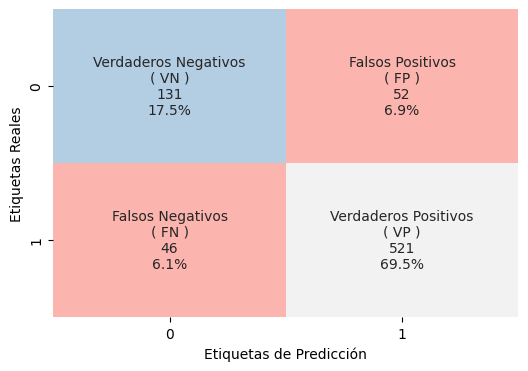

---------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       183
           1       0.91      0.92      0.91       567

    accuracy                           0.87       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.87      0.87      0.87       750

Porcentaje de la clase minoritaria (clase positiva): 75.6%
Porcentaje de la clase mayoritaria (clase negativa): 24.4%


In [ ]:
# Evaluaci√≥n del desempe√±o con exatitud (accuracy) y matriz de confusi√≥n
conf_matrix_class_report(y_test, yhat_test)
print_percentage_pos_neg_class(y_test)

# 3d
Incluye tus comentarios.

1.   Desempe√±o del Modelo Pre-entrenado:

 *   El modelo pre-entrenado de DistilBERT muestra un buen desempe√±o inicial con una exactitud del 83% en el conjunto de entrenamiento. Sin embargo, existe un cierto grado de desequilibrio entre las clases, con una mayor precisi√≥n y recall para la clase positiva en comparaci√≥n con la negativa.
 *   La precisi√≥n y recall m√°s bajos para la clase negativa indican que el modelo tiene una mayor tendencia a clasificar comentarios negativos como positivos.

2.   Mejoras con Fine-Tuning:

 *   El modelo ajustado con fine-tuning muestra una mejora significativa en el desempe√±o con una exactitud del 90.3% en el conjunto de validaci√≥n y 89% en el conjunto de prueba.
 *   La matriz de confusi√≥n y el reporte de clasificaci√≥n indican que el modelo fine-tuned es m√°s equilibrado en t√©rminos de precisi√≥n y recall entre las clases positivas y negativas.
 *   La mejora en el f1-score para ambas clases sugiere que el modelo ajustado es m√°s eficaz para distinguir entre comentarios positivos y negativos.

3.   Distribuci√≥n de Clases:

 *   La distribuci√≥n de clases se mantiene consistente a trav√©s de los conjuntos de entrenamiento, validaci√≥n y prueba, lo cual es crucial para asegurar que el modelo no est√© sesgado hacia una clase espec√≠fica.
 *   El modelo muestra un buen manejo de las clases desbalanceadas, especialmente despu√©s del ajuste de hiperpar√°metros.

Conclusiones:
*   El ajuste de hiperpar√°metros (fine-tuning) en el modelo DistilBERT ha demostrado ser efectivo para mejorar el desempe√±o del modelo en el an√°lisis de sentimientos de los comentarios de Amazon.
*   El modelo fine-tuned ofrece una mejor precisi√≥n y recall equilibrados para ambas clases, lo que resulta en una exactitud y f1-score superiores en comparaci√≥n con el modelo pre-entrenado.




# Pregunta 4
En este ejercicio vas a realizar una comparaci√≥n simple entre un modelo Transformer pre-
entrenado para traducci√≥n de ingl√©s a espa√±ol, con un modelo LLM (Large Language Model).
Para ello selecciona de manera aleatoria 10 comentarios del conjunto de AmazonBaby5000

In [11]:
random_comments = random.sample(x_train, 10)


print("\n".join(random_comments))

Though it didn't match my aunt's son nursery it kept his attention for longer than the other mobile that went with his bedding called moonbeam mobile. He loves it!
This was much smaller and not at all what was described.  The product is hard and not desirable for what it was designed for.  We did receive it promptly though.
I like the pendent it's very pretty  the neckless is a little small but over all I like it alot
We have had this stroller for 2 years. I power walk with it 5 miles a day, 5 days a week year round (except snow/ice) so it gets a lot of use. My children are now almost 4 (35 lbs) and almost 2 (25 lbs). We have been using it since my 23 month old was born with her chicco infant carrier. I am so happy with the durability of the stroller for the price that I paid. I would recommend it to anyone. It has been on several airplane trips (I always detach the front canopy and pack it in our large suitcase) and it has been used everywhere from Disney World to the North Carolina B

# 4 a
Utiliza el modelo Tansformer pre-entrenado para traducci√≥n de ingl√©s a espa√±ol
llamado Helsinki-NLP/opus-mt-en-es de Huggingface y traduce los 10 comentarios que
seleccionaste.

In [20]:
model_name = "Helsinki-NLP/opus-mt-en-es"

translate_pipeline = pipeline("translation", model=model_name, tokenizer=model_name, truncation=True, max_length=1024)

translated_comments_hugg = translate_pipeline(random_comments)

In [21]:
translated_comments_hugg

[{'translation_text': 'A pesar de que no coincid√≠a con la guarder√≠a de mi hijo t√≠a mantuvo su atenci√≥n por m√°s tiempo que el otro m√≥vil que iba con su ropa de cama llamada moonbeam m√≥vil. ¬°Le encanta!'},
 {'translation_text': 'Esto era mucho m√°s peque√±o y no en absoluto lo que se describi√≥. El producto es duro y no deseable para lo que fue dise√±ado. Lo recibimos r√°pidamente, sin embargo.'},
 {'translation_text': 'Me gusta el pendent es muy bonito el sin cuello es un poco peque√±o pero sobre todo me gusta mucho'},
 {'translation_text': 'Hemos tenido este cochecito durante 2 a√±os. Yo puedo caminar con √©l 5 millas al d√≠a, 5 d√≠as a la semana todo el a√±o (excepto nieve / hielo) por lo que tiene mucho uso. Mis hijos ahora son casi 4 (35 libras) y casi 2 (25 libras). Hemos estado utilizando desde que mi 23 mes de edad naci√≥ con su portabeb√© chicco. Estoy tan feliz con la durabilidad del cochecito por el precio que pagu√©. Lo recomendar√≠a a cualquiera. Ha sido en varios vi

# 4 b
Utiliza ahora el LLM Gemini de Google a trav√©s de su API para traducir los mismos 10
comentarios del inciso anterior. NOTA: deber√°s proponer el
prompt que consideres
adecuado para la traducci√≥n, incluyendo si consideras que ayuda, que tome en cuenta
errores tipogr√°ficos (
typos), o alg√∫n otro tipo de consideraci√≥n.
NOTA: Puedes consultar la siguiente liga para familiarizarte con la API de Gemini:
https://ai.google.dev/gemini-api/docs/get-started/tutorial?hl=es-419&lang=python

In [ ]:
genai.configure(api_key="......")

In [23]:
model = genai.GenerativeModel(model_name = 'gemini-1.0-pro')

In [24]:
prompt = "Translate the phrases in quotes {text} to spanish, return a json array with objects with the keys translation_text"

In [25]:
real_prompt = prompt.format(text=", ".join(f'"{w}"' for w in random_comments))

print(real_prompt)

Translate the phrases in quotes "Though it didn't match my aunt's son nursery it kept his attention for longer than the other mobile that went with his bedding called moonbeam mobile. He loves it!", "This was much smaller and not at all what was described.  The product is hard and not desirable for what it was designed for.  We did receive it promptly though.", "I like the pendent it's very pretty  the neckless is a little small but over all I like it alot", "We have had this stroller for 2 years. I power walk with it 5 miles a day, 5 days a week year round (except snow/ice) so it gets a lot of use. My children are now almost 4 (35 lbs) and almost 2 (25 lbs). We have been using it since my 23 month old was born with her chicco infant carrier. I am so happy with the durability of the stroller for the price that I paid. I would recommend it to anyone. It has been on several airplane trips (I always detach the front canopy and pack it in our large suitcase) and it has been used everywhere

In [26]:
response = model.generate_content(real_prompt)

In [27]:
translated_comments_gemini = json.loads(response.text)

In [28]:
translated_comments_gemini

[{'translation_text': 'Aunque no combinaba con la habitaci√≥n del hijo de mi t√≠a, capt√≥ su atenci√≥n por m√°s tiempo que el otro m√≥vil que tra√≠a, el llamado m√≥vil rayo de luna. ¬°Le encant√≥!'},
 {'translation_text': 'Era mucho m√°s peque√±o y para nada era lo que describ√≠an. El producto es duro y no es deseable para lo que fue dise√±ado. Sin embargo, s√≠ lo recibimos con prontitud.'},
 {'translation_text': 'Me gusta el dije, es muy bonito, pero el collar es un poco peque√±o. En general, me agrada mucho.'},
 {'translation_text': 'Hemos tenido esta carreola durante 2 a√±os. Caminamos r√°pidamente con ella 8 kil√≥metros al d√≠a, 5 d√≠as a la semana, todo el a√±o (excepto cuando hay nieve o hielo), por lo que la usamos mucho. Mis hijos tienen ahora casi 4 a√±os (16 kilos) y casi 2 (11 kilos). La hemos usado desde que mi hija de 23 meses naci√≥ con su portabeb√©s Chicco. Estoy muy contenta con la durabilidad de la carreola por el precio que pagu√©. Se la recomendar√≠a a todos. Ha est

In [29]:
array = []
for i, row in enumerate(translated_comments_gemini):
    row = [
        random_comments[i],
        translated_comments_gemini[i]['translation_text'],
        translated_comments_hugg[i]['translation_text']
    ]

    array.append(row)

dataframe = pd.DataFrame(array, columns=['original', 'gemini', 'hugging'])

# 4c

Despliega ambas traducciones de manera tabular y compara los resultados obtenidos.
Incluye tus conclusiones y los pros y contras que detectas en cada t√©cnica.
NOTA: Aunque la comparaci√≥n ser√° de manera subjetiva, el punto de vista de una
persona es muy valioso y nos puede proporcionar una buena idea de los desempe√±os de
los modelos.


In [30]:
from google.colab import data_table

data_table.enable_dataframe_formatter()

dataframe

original  \
0  Though it didn't match my aunt's son nursery i...   
1  This was much smaller and not at all what was ...   
2  I like the pendent it's very pretty  the neckl...   
3  We have had this stroller for 2 years. I power...   
4  This is a really great basic car seat.  It's n...   
5  I purchased the Safety 1st High-Def Digital Vi...   
6  Got these burp clothes in addition to the towe...   
7  This monitor is a complete waste of money. It ...   
8  But I had two of them ripping on the first was...   
9  I love beautiful excellent product, Very good ...   

                                              gemini  \
0  Aunque no combinaba con la habitaci√≥n del hijo...   
1  Era mucho m√°s peque√±o y para nada era lo que d...   
2  Me gusta el dije, es muy bonito, pero el colla...   
3  Hemos tenido esta carreola durante 2 a√±os. Cam...   
4  Esta es una silla para auto b√°sica realmente g...   
5  Compr√© el monitor digital de video de alta def...   
6  Obtuve estos pa√±os para eructar adem√°s de la t...   
7  Este monitor es un completo desperdicio de din...   
8  Pero dos se me rompieron en el primer lavado y...   
9  Me encanta el hermoso y excelente producto. Mu...   

                                             hugging  
0  A pesar de que no coincid√≠a con la guarder√≠a d...  
1  Esto era mucho m√°s peque√±o y no en absoluto lo...  
2  Me gusta el pendent es muy bonito el sin cuell...  
3  Hemos tenido este cochecito durante 2 a√±os. Yo...  
4  Este es un asiento b√°sico muy grande del coche...  
5  Hace unos meses compr√© el monitor de v√≠deo dig...  
6  Tengo estas ropas eructas adem√°s de la toalla ...  
7  Este monitor es una completa p√©rdida de dinero...  
8  Pero yo ten√≠a dos de ellos rasgando en el prim...  
9  Me encanta hermoso producto excelente, Muy bue...

### Conclusiones 2da Parte

En general las traducciones del modelo Helsinki-NLP/opus-mt-en-es no fueron tan acertadas en comparaci√≥n con las traducciones del LLM Gemini. Ambas tecnolog√≠as ocupan la arquitectura transformer pero gemini en vez de ser un modelo monol√≠tico esta dividido en modelos especializados m√°s peque√±os llamados Mezcla de Expertos que le permiten ser entrenados m√°s r√°pido y ejecutado en m√°quinas con menos recursos.

El modelo de hugginsface esta alimentados con texto en ingles y espa√±ol del corpus OPUS en contraste el modelo Gemini no es p√∫blico su corpus sin embargo contiene Libros, Articulos, C√≥digo y Di√°logos que le permiten enriquecer el contexto y vocabulario por lo que se refleja con m√°s precisi√≥n las traducciones enviadas.

### FIN DE LA ACTIVIDAD